In [1]:
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import matplotlib.pylab as plt
import scipy.sparse as sps
from random import randint
df = pd.read_csv('online_retail_transaction.csv',header=None,index_col=None)
df.shape # dimensione originale

(4372, 4223)

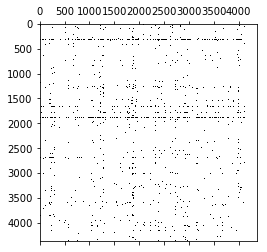

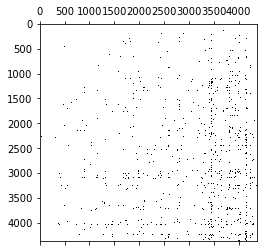

Bandwidth first RCM 4363
Bandwidth after RCM 3991


In [15]:
# nel caso volessimo aggiungere zeri per renderla quadrat
df_new_complete = df.iloc[:500,:500]
zero_data_to_add = np.zeros(shape=(len(df),len(df)-len(df.columns)))
columns_to_add = [x for x in range(len(df.columns),len(df))] 
df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,dtype='uint8')

# creo il dataset completo aggiungendo tutti gli zeri che mancano
df_new_complete = pd.concat([df, df_to_add], axis=1)
df_new_complete
# first
plt.spy(df_new_complete)
plt.show()

# after RCM
sparse = csr_matrix(df_new_complete)
order = reverse_cuthill_mckee(sparse)
plt.spy(df_new_complete.loc[order][order])
plt.show()
# dataframe inizale
[i,j]=np.where(df_new_complete == 1)
bw = max(i-j) +1
print("Bandwidth first RCM",bw)

# dataframe dopo RCM
[i,j]=np.where(df_new_complete.loc[order][order] == 1)
bw = max(i-j) +1
print("Bandwidth after RCM",bw)


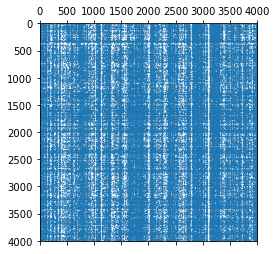

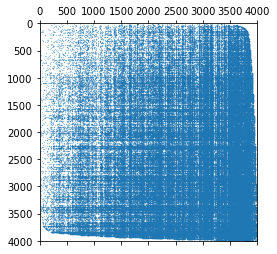

Bandwidth first RCM 3992
Bandwidth after RCM 3669


In [29]:
# same but use only first 1000 sample
df_new_complete = df.iloc[:4000,:4000]
df_new_complete
# first
plt.spy(df_new_complete,marker='.',markersize='0.3')
plt.show()

# after RCM
sparse = csr_matrix(df_new_complete)
order = reverse_cuthill_mckee(sparse)
plt.spy(df_new_complete.loc[order][order],marker='.',markersize='0.3')
plt.show()
# dataframe inizale
[i,j]=np.where(df_new_complete == 1)
bw = max(i-j) +1
print("Bandwidth first RCM",bw)

# dataframe dopo RCM
[i,j]=np.where(df_new_complete.loc[order][order] == 1)
bw = max(i-j) +1
print("Bandwidth after RCM",bw)

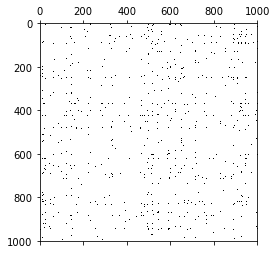

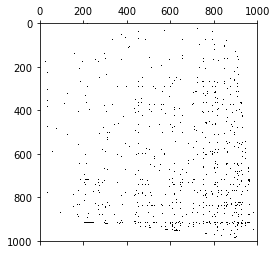

Bandwidth first RCM 999
Bandwidth after RCM 785


In [68]:
file = open("lista_items.txt", "r") 
items = file.read().splitlines()
#items[:1500]

# permutazione random e prendo i primi 1000 elementi di row e column
random_column = np.random.permutation(df.shape[1])[:1000]
random_row = np.random.permutation(df.shape[0])[:1000]
items_select = [items[i] for i in random_column] # recupero gli item selezionati
#items_new
df_to_test = df.iloc[random_row][random_column];
#df_to_test
#items_new


#first RCM
plt.spy(df_to_test)
plt.show()

# after RCM
# prima di fare questo devo separare l'item sensibile per farlo funzionare come si deve
sparse = csr_matrix(df_to_test)
order = reverse_cuthill_mckee(sparse)
# ora devo prendere gli item selzionati prima e riordinarli ancora
# secondo quello scritto in order quindi
items_final = [items_select[i] for i in order]
column_reordered = [df_to_test.columns[i] for i in order]
df_to_test_band = df_to_test.iloc[order][column_reordered]
plt.spy(df_to_test_band)
plt.show()

# dataframe inizale
[i,j]=np.where(df_to_test == 1)
bw = max(i-j) +1
print("Bandwidth first RCM",bw)
# dataframe dopo RCM
[i,j]=np.where(df_to_test.iloc[order][column_reordered] == 1)
bw = max(i-j) +1
print("Bandwidth after RCM",bw)

In [69]:
# un esempio di come seleziono gli item
# items_final[2] == ETCHED GLASS STAR TREE DECORATION
# order[2] == 682
# items_select[682] == 'ETCHED GLASS STAR TREE DECORATION'
# random_column[682] == 1237
# items[1237] == 'ETCHED GLASS STAR TREE DECORATION'
#items_final
#order 

array([402, 433, 817, 513, 627, 566, 374, 376, 921,  42, 287, 645, 629,
       743, 865, 965, 863, 524, 560, 555, 184,  23, 943, 656, 595, 981,
       326, 453, 422, 349, 117,  91, 105, 421, 525, 937, 731, 784, 360,
        64, 819, 148,  80, 612, 877, 677, 386, 221, 961, 392, 857, 715,
       157, 246, 372, 607, 703, 963, 866, 576, 314, 914,  39, 444, 393,
       826, 365, 477, 262, 974, 736, 831,  17, 692, 304, 876, 794, 403,
       305, 714, 350, 415, 613, 580, 542, 955, 660, 600, 194, 330, 915,
        78, 143,  40, 298, 614, 860, 320, 264,  95, 118,  44,  27,  87,
       185, 751, 700, 362, 891, 319, 347, 885, 675,  62, 103, 643, 409,
       951, 752, 861,  83, 337, 624,  58, 220, 587, 428, 711, 389, 740,
       147, 306, 950,  41, 442, 257, 923, 520, 438, 976, 782, 881, 854,
       867, 351,  73, 256, 858, 397, 480, 670, 590, 894, 642, 413, 212,
        81, 508, 909,  72, 333,  75, 534, 470, 375, 838,  33, 313, 579,
       240, 851, 735, 834, 149,  70, 945, 252, 616, 725, 586, 26

In [70]:
items_select[682]

'ENGLISH ROSE SCENTED HANGING HEART'

In [71]:
random_column[682]


1229

In [72]:

items[random_column[682]]

'ENGLISH ROSE SCENTED HANGING HEART'

In [73]:
# sum all transaction on all column (all products)
df_to_test_band[df_to_test_band.columns].sum()

2569     1
1932     1
1543     0
377      0
3368     1
216      1
758      1
2197     1
2232     4
3908     0
2264     1
2358     0
943      0
2307     0
2682     1
1914     1
168      1
1127     0
1316     0
1490     0
316      0
420      4
468      0
3391     0
2097     4
945      1
844      0
2071     2
2010     0
2405     1
        ..
4133     0
3998     1
3886     0
3592     9
3084     0
3859     4
457      1
3342     1
933      0
1379     5
2248     0
904      0
2110     3
4173     0
383      0
1930     0
1805     1
1213    68
2981     0
4059     0
2242     0
5        0
1945     0
2279     0
1012     0
181      0
2863     0
3897     0
2703     0
1896     0
dtype: int64

In [74]:
df_to_test_band

,2569,1932,1543,377,3368,216,758,2197,2232,3908,...,2242,5,1945,2279,1012,181,2863,3897,2703,1896
1297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_to_test_band_column = df_to_test_band
df_to_test_band_column.columns = items_final
df_to_test_band_column

,PINK CHERRY LIGHTS,LARGE BONNE JAM JAR T-LIGHT HOLDER,GOLD COSMETIC BAG PINK STAR,BLACK BAROQUE CARRIAGE CLOCK,SILVER BLACK ORBIT DROP EARRINGS,ANTIQUE OLIVE GREEN FLOWER EARRINGS,CHILDRENS SPACEBOY MUG,MISELTOE HEART WREATH WHITE,MULTICOLOUR CONFETTI IN TUBE,WHITE CHRYSANTHEMUMS ART FLOWER,...,MURANO STYLE GLASS BRACELET BLACK,I LOVE LONDON MINI RUCKSACK,LARGE HEART FLOWERS HOOK,NUMBER TILE COTTAGE GARDEN 0,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,AMBER GLASS TASSLE BAG CHARM,RED PURSE WITH PINK HEART,WHITE BEADED GARLAND STRING 20LIGHT,PINK/WHITE RIBBED MELAMINE JUG,KIDS CUTLERY SPACEBOY
1297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
